In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('..\Data\metadata.csv')

In [3]:
df.head() 

,uid,data_provider,region,lat,lon,date,time,abun,severity,distance_to_water_m
0,aabm,Indiana_State_Department_of_Health,midwest,39.080319,-86.430867,20180514,15:00:00,0.585,1,0.0
1,aabn,California_Environmental_Data_Exchange_Network,west,36.559700,-121.510000,20160831,16:15:00,5867.500,4,3512.0
2,aacd,NC_Division_of_Water_Resources_NC_Department_o...,south,35.875083,-78.878434,20201119,0:01:00,0.290,1,514.0
3,aaee,NC_Division_of_Water_Resources_NC_Department_o...,south,35.487000,-79.062133,20160824,0:01:00,1.614,1,129.0
4,aaff,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,38.049471,-99.827001,20190723,0:01:00,111.825,3,19.0


## Basic data analysis

### Check for the data type of each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23570 entries, 0 to 23569
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   uid                  23570 non-null  object 
 1   data_provider        23570 non-null  object 
 2   region               23570 non-null  object 
 3   lat                  23570 non-null  float64
 4   lon                  23570 non-null  float64
 5   date                 23570 non-null  int64  
 6   time                 23570 non-null  object 
 7   abun                 23570 non-null  float64
 8   severity             23570 non-null  int64  
 9   distance_to_water_m  23569 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 1.8+ MB


### Check for Unique Values in each column

In [5]:
for col in df.columns:
    print(f'{col} : {df[col].nunique()}')

uid : 23570
data_provider : 14
region : 4
lat : 8583
lon : 11167
date : 1637
time : 667
abun : 14647
severity : 5
distance_to_water_m : 1587


In [6]:
# No. of unique values in uid column is same as number of rows so this doesn't provide any significance to the data

df.drop('uid', axis=1, inplace=True) 

### Check for null values in each column

In [7]:
df.isna().sum() 

data_provider          0
region                 0
lat                    0
lon                    0
date                   0
time                   0
abun                   0
severity               0
distance_to_water_m    1
dtype: int64

In [8]:
# Only 1 null value so entire row can be dropped

df.dropna(inplace=True)

### Check for duplicate rows

In [9]:
df.duplicated().sum()

np.int64(0)

### Date column is of int data type which is not correct

In [10]:
df['date'] = df['date'].astype(str) # Temporarily converting to string

### Separating Numerical and Categorical Columns

In [11]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['data_provider', 'region', 'date', 'time']
Numerical Columns: ['lat', 'lon', 'abun', 'severity', 'distance_to_water_m']


In [12]:
df[cat_cols].head()

,data_provider,region,date,time
0,Indiana_State_Department_of_Health,midwest,20180514,15:00:00
1,California_Environmental_Data_Exchange_Network,west,20160831,16:15:00
2,NC_Division_of_Water_Resources_NC_Department_o...,south,20201119,0:01:00
3,NC_Division_of_Water_Resources_NC_Department_o...,south,20160824,0:01:00
4,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,20190723,0:01:00


In [13]:
df[num_cols].head()

,lat,lon,abun,severity,distance_to_water_m
0,39.080319,-86.430867,0.585,1,0.0
1,36.559700,-121.510000,5867.500,4,3512.0
2,35.875083,-78.878434,0.290,1,514.0
3,35.487000,-79.062133,1.614,1,129.0
4,38.049471,-99.827001,111.825,3,19.0


## Analyzing Categorical Columns

In [14]:
df[cat_cols].head()

,data_provider,region,date,time
0,Indiana_State_Department_of_Health,midwest,20180514,15:00:00
1,California_Environmental_Data_Exchange_Network,west,20160831,16:15:00
2,NC_Division_of_Water_Resources_NC_Department_o...,south,20201119,0:01:00
3,NC_Division_of_Water_Resources_NC_Department_o...,south,20160824,0:01:00
4,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,20190723,0:01:00


### Check for unique values in each column

In [ ]:
for col in cat_cols:
    print(f'{col} : {df[col].nunique()}')

data_provider : 14
region : 4
date : 1637
time : 667


### Count of values in each column

In [16]:
# Data Provider
df['data_provider'].value_counts(normalize=True)

data_provider
NC_Division_of_Water_Resources_NC_Department_of_Environmental_Quality                      0.462557
California_Environmental_Data_Exchange_Network                                             0.239510
Bureau_of_Water_Kansas_Department_of_Health_and_Environment                                0.062158
US_Army_Corps_of_Engineers                                                                 0.048581
EPA_Central_Data_Exchange                                                                  0.046077
EPA_National_Aquatic_Research_Survey                                                       0.037889
Pennsylvania_Department_of_Environmental_Protection                                        0.035470
Indiana_State_Department_of_Health                                                         0.027536
Connecticut_State_Department_of_Public_Health                                              0.013789
Delaware_National_Resources_and_the_University_of_Delaware's_Citizen_Monitoring_Progra

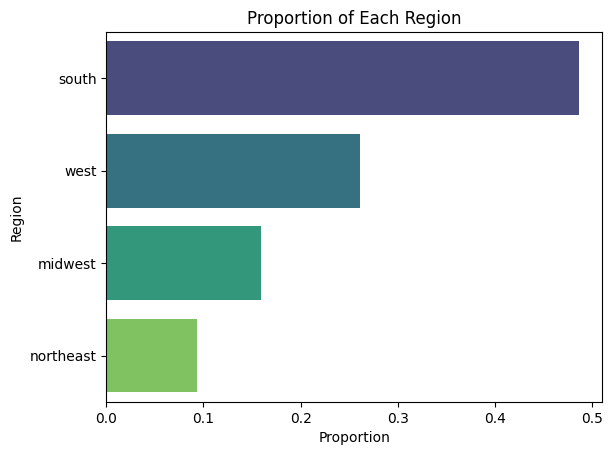

In [17]:
# Region
region_counts = df['region'].value_counts(normalize=True)

sns.barplot(y=region_counts.index, x=region_counts.values, palette='viridis')
plt.ylabel('Region')
plt.xlabel('Proportion')
plt.title('Proportion of Each Region')
plt.show()

In [18]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

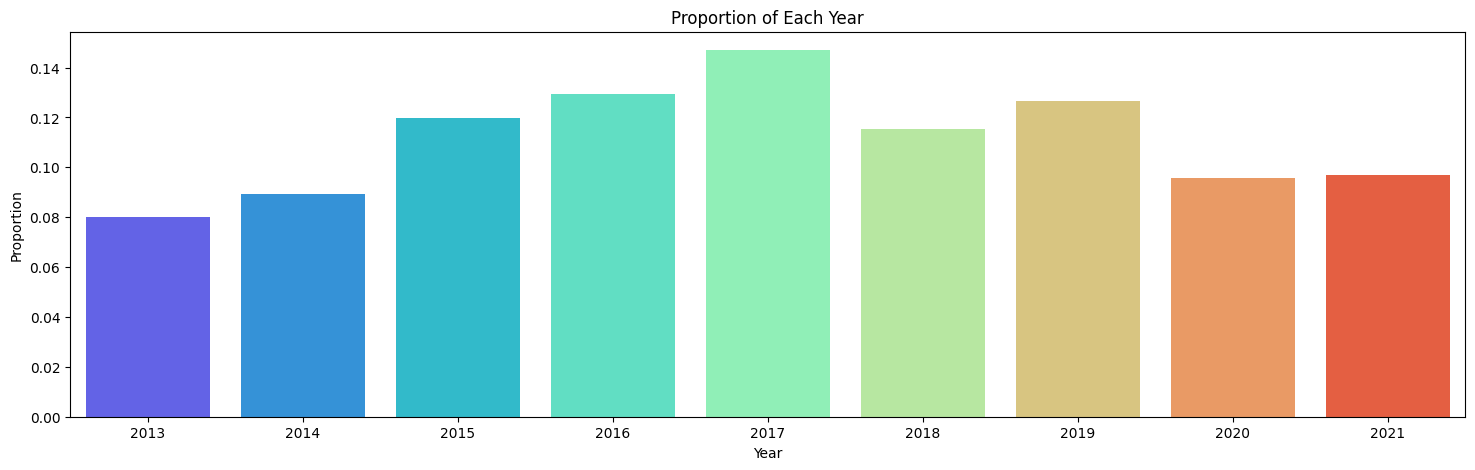

In [19]:
# Year
year_counts = df['year'].value_counts(normalize=True)

fig =  plt.figure(figsize=(18,5))

sns.barplot(y=year_counts.values, x=year_counts.index, palette='rainbow')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Proportion of Each Year')
plt.show()

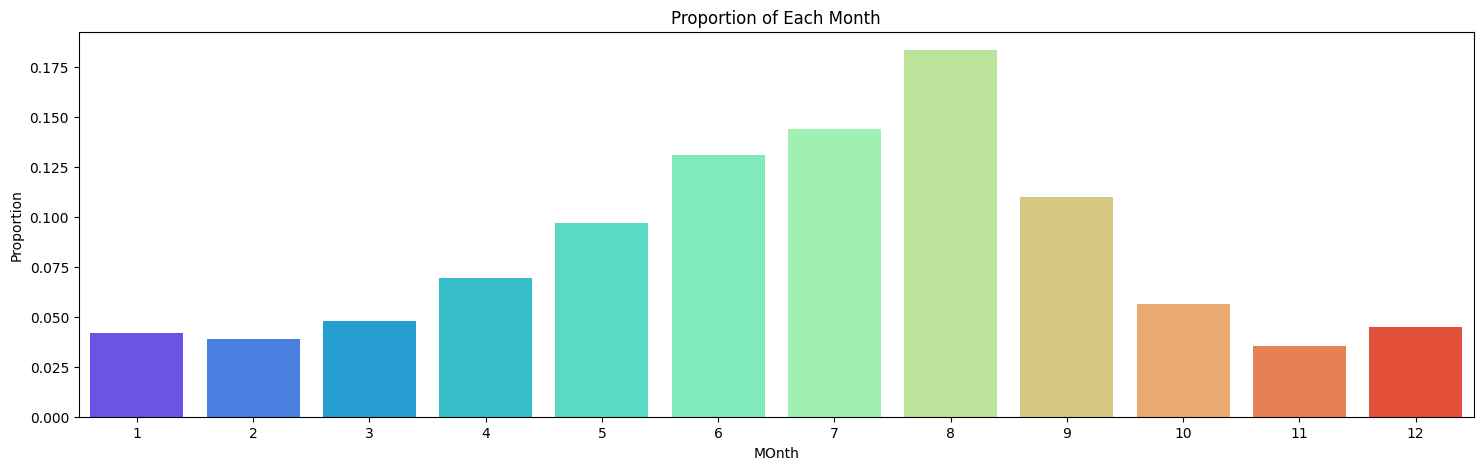

In [20]:
# Month
month_counts = df['month'].value_counts(normalize=True)

fig =  plt.figure(figsize=(18,5))

sns.barplot(y=month_counts.values, x=month_counts.index, palette='rainbow')
plt.xlabel('MOnth')
plt.ylabel('Proportion')
plt.title('Proportion of Each Month')
plt.show()

In [21]:
def get_season(month):
    return ('winter' if month in [12, 1, 2] else
            'spring' if month in [3, 4, 5] else
            'summer' if month in [6, 7, 8] else 'fall')
    
df['season'] = df['month'].apply(get_season)
df.season.value_counts()

season
summer    10812
spring     5045
fall       4758
winter     2954
Name: count, dtype: int64

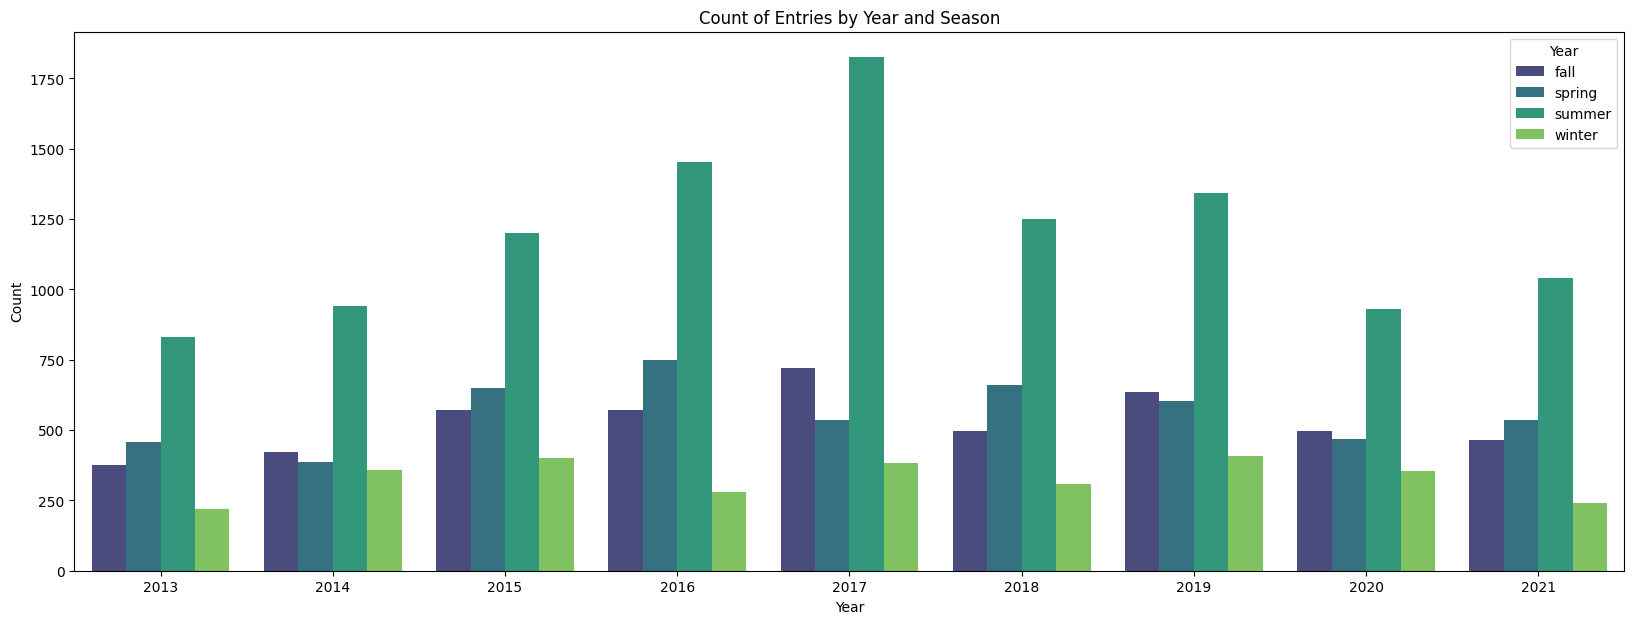

In [22]:
# Year and Season
fig = plt.figure(figsize=(20,7))

season_data = df.groupby(['year', 'season']).size().reset_index(name='count')

# Create a count plot
sns.barplot(x='year', y='count', hue='season', data=season_data, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Entries by Year and Season')
plt.legend(title='Year')
plt.show()

In [23]:
df['time'] = pd.to_datetime(df['time'])

df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second
df['am'] = (df['hour'] < 12).astype(int)

In [24]:
df.drop('time', axis = 1, inplace = True)

## Analyzing Numerical Columns

In [ ]:
df[num_cols].describe()

,lat,lon,abun,severity,distance_to_water_m
count,23569.000000,23569.000000,23569.000000,23569.000000,23569.000000
mean,37.598886,-91.437616,1266.304903,2.253172,436.444525
std,2.823707,17.886941,6202.562018,1.238736,600.447428
min,26.389430,-124.179200,0.000000,1.000000,0.000000
25%,35.700919,-109.370990,4.359000,1.000000,0.000000
50%,36.226300,-79.267976,43.568000,2.000000,246.000000
75%,38.930270,-79.026096,1014.800250,4.000000,664.000000
max,48.973250,-67.698650,804667.500000,5.000000,6468.000000


In [26]:
df['severity'].value_counts(normalize=True)

severity
1    0.414146
4    0.247062
2    0.173236
3    0.161738
5    0.003819
Name: proportion, dtype: float64

In [27]:
severity_level = {1:'<20K', 2: '20K - <100K',3: '100K - <1M',4: '1M - <10M', 5:'≥10M'}

df['bacteria_counts'] = df['severity'].map(severity_level)

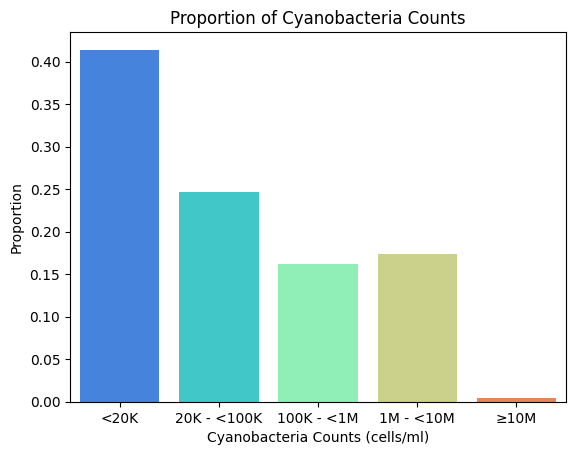

In [28]:
# Severity
severity_counts = df['bacteria_counts'].value_counts(normalize=True, sort=False)

sns.barplot(y=severity_counts.values, x=severity_level.values(), palette='rainbow')
plt.xlabel('Cyanobacteria Counts (cells/ml)')
plt.ylabel('Proportion')
plt.title('Proportion of Cyanobacteria Counts')
plt.xticks(list(severity_level.values()))
plt.show()

In [29]:
# Converting density of bacteria from cells/ml to cells/L
df['density'] = (df['abun'] * 1000).astype(int)

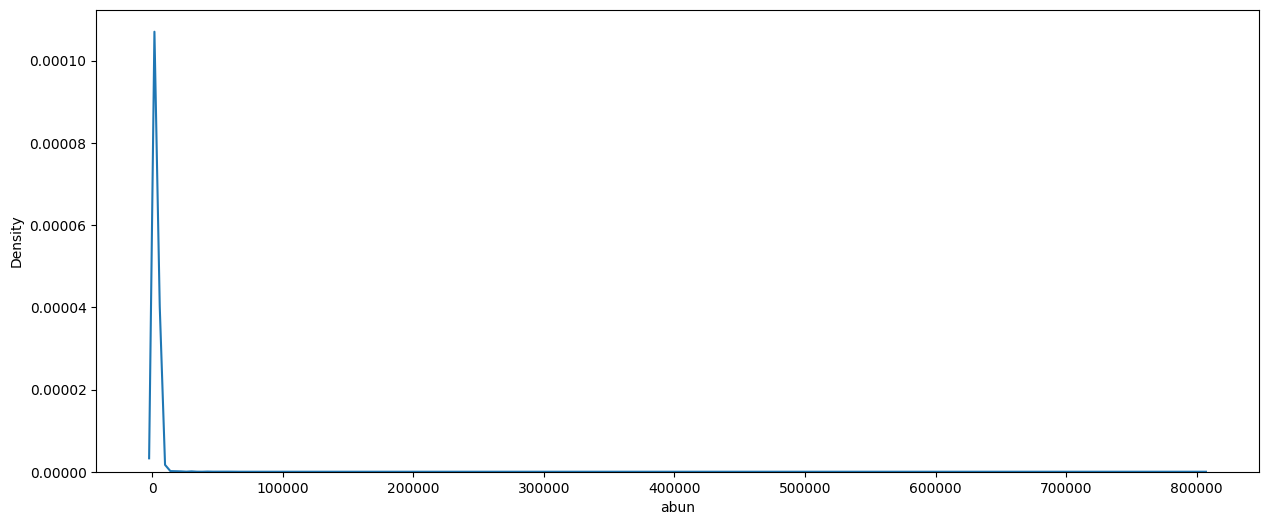

In [30]:
plt.figure(figsize = (15, 6))
sns.kdeplot(df['abun'])
plt.show()

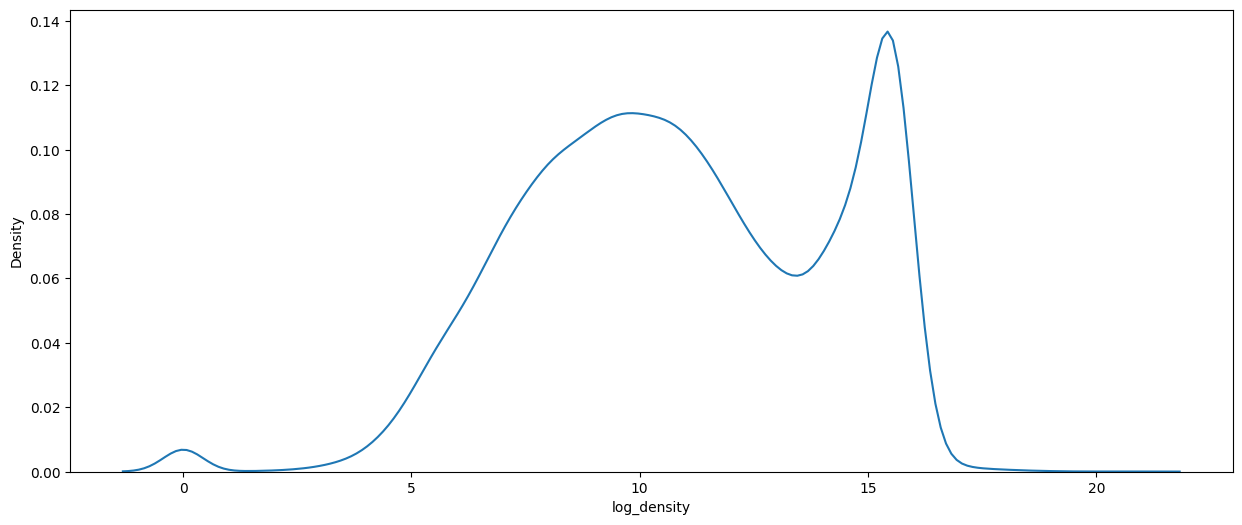

In [31]:
df['log_density'] = np.where(df['density'] > 0, np.log(df['density']), 0) 

plt.figure(figsize = (15, 6))
sns.kdeplot(df['log_density'])
plt.show()

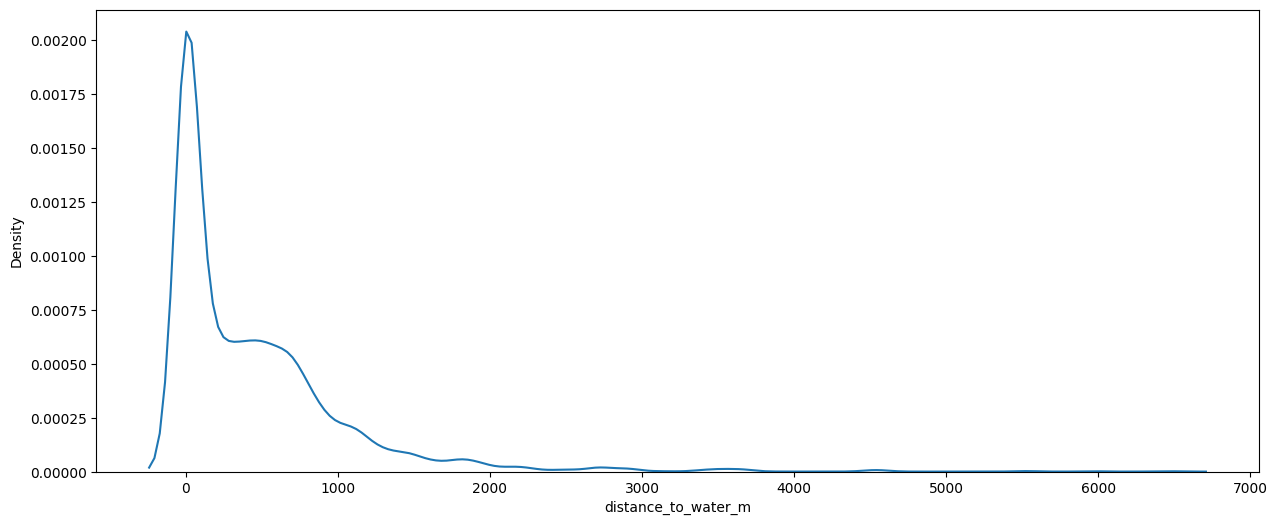

In [32]:
plt.figure(figsize = (15, 6))
sns.kdeplot(df['distance_to_water_m'])
plt.show()

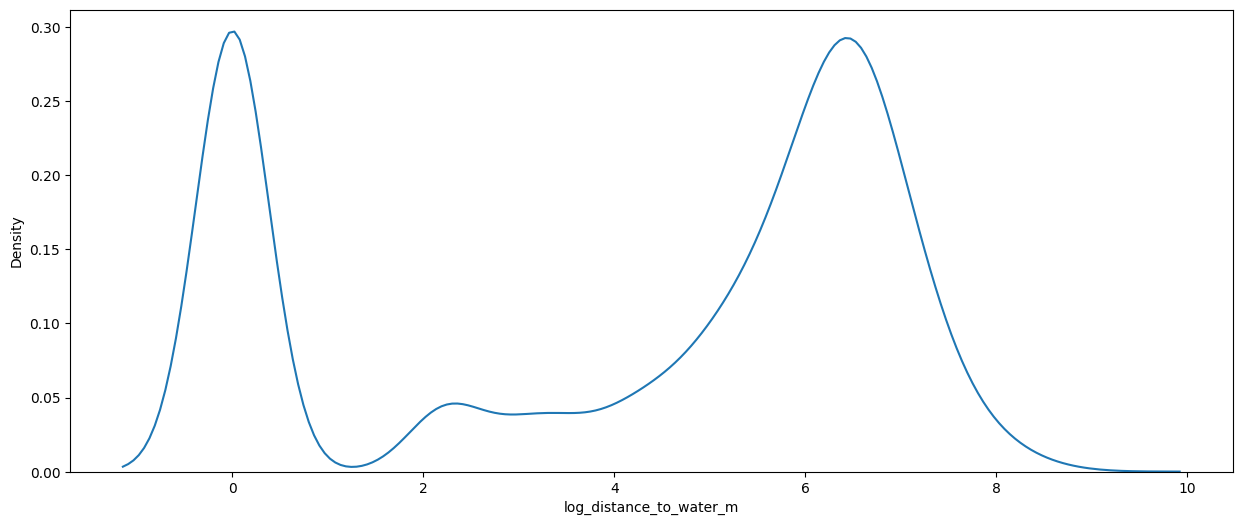

In [33]:
df['log_distance_to_water_m'] = np.where(df['distance_to_water_m'] > 0, np.log(df['distance_to_water_m']), 0) 

plt.figure(figsize = (15, 6))
sns.kdeplot(df['log_distance_to_water_m'])
plt.show()

In [34]:
df.loc[df['abun']==0,'severity'] = 0
df.loc[df['abun']==0,'bacteria_counts'] = '0'

In [35]:
df.severity.value_counts()

severity
1    9584
4    5823
2    4083
3    3812
0     177
5      90
Name: count, dtype: int64

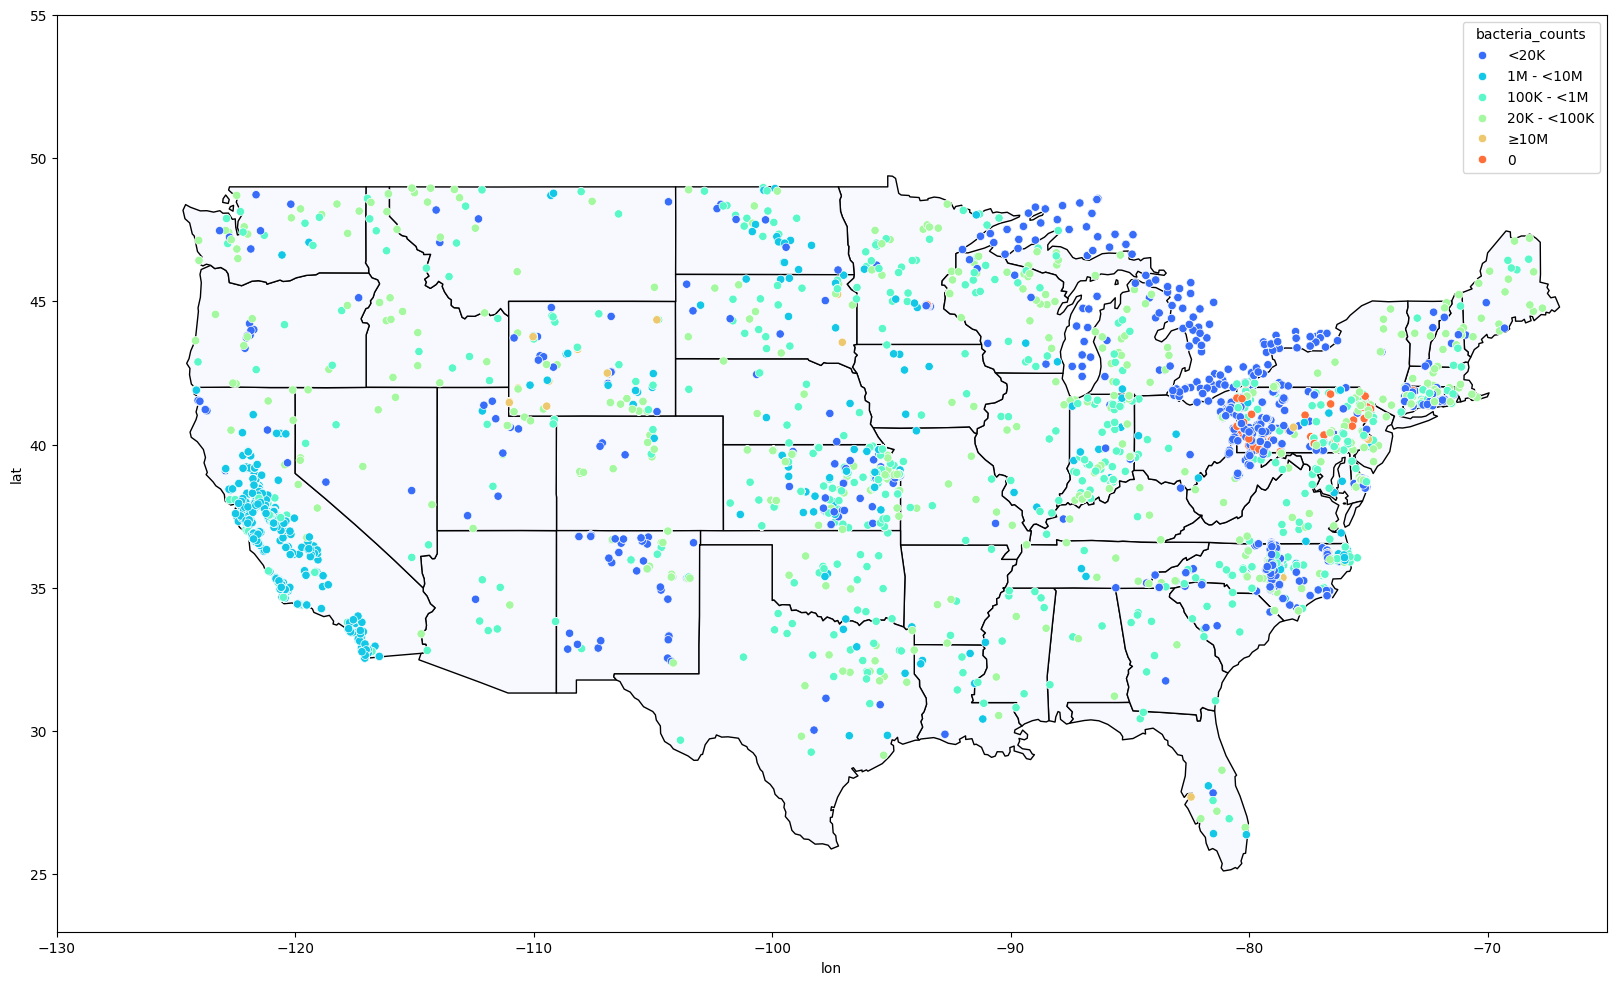

In [36]:
import geopandas as gpd
from shapely.geometry import Point

url = "../usa.json"
gdf = gpd.read_file(url)

usa = gdf[~gdf['id'].isin(['02', '15'])] # remove alaska and hawaii

df['geometry'] = df.apply(lambda row: Point(row['lon'], row['lat']), axis=1) 
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

base = usa.plot(color='ghostwhite', edgecolor='black', figsize=(20, 20))
sns.scatterplot(x = 'lon', y = 'lat', data = gdf, hue = 'bacteria_counts', ax = base, palette = 'rainbow')

plt.axis([-130, -65, 23, 55])
plt.show()

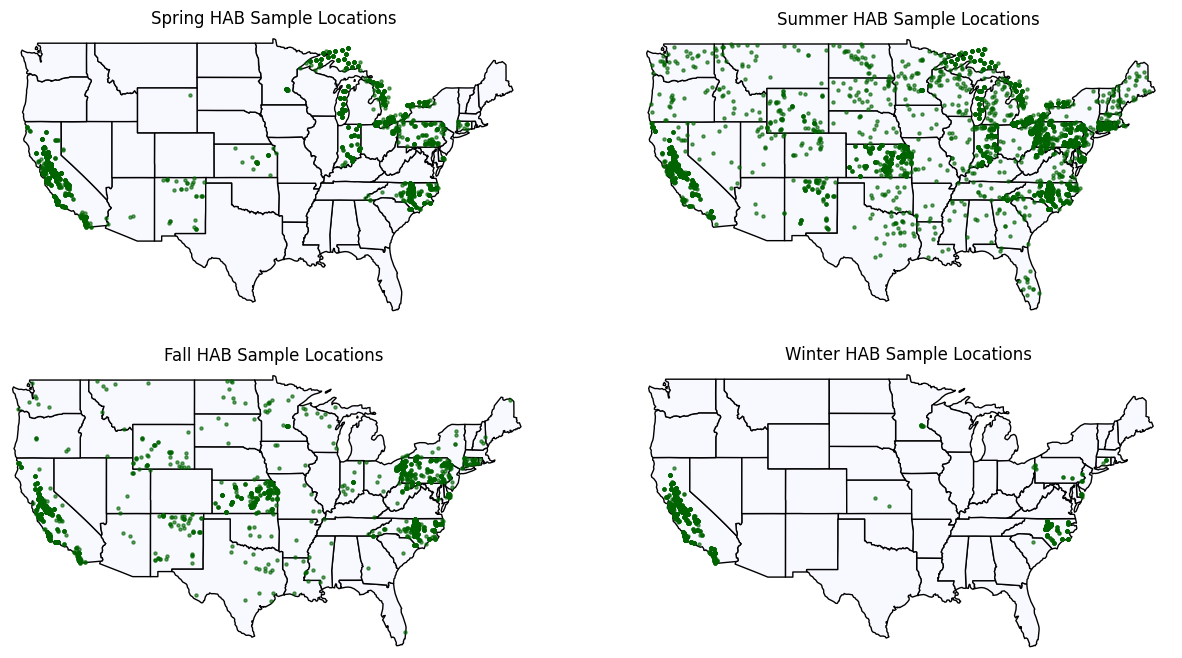

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

for season, ax in zip(gdf.season.unique(), axes.flatten()):
    base = usa.plot(color='ghostwhite', edgecolor='black', ax = ax)
    subset = gdf[gdf['season'] == season]
    subset.plot(ax=base, marker="o", color="darkgreen", markersize=5, alpha=0.6)

    ax.set_xlim([-125, -65])
    ax.set_ylim([25, 50])
    ax.set_title(f"{season.capitalize()} HAB Sample Locations")
    ax.axis("off")

In [38]:
df.head()

,data_provider,region,lat,lon,date,abun,severity,distance_to_water_m,year,month,...,season,hour,minute,second,am,bacteria_counts,density,log_density,log_distance_to_water_m,geometry
0,Indiana_State_Department_of_Health,midwest,39.080319,-86.430867,2018-05-14,0.585,1,0.0,2018,5,...,spring,15,0,0,0,<20K,585,6.371612,0.000000,POINT (-86.43086667 39.08031907)
1,California_Environmental_Data_Exchange_Network,west,36.559700,-121.510000,2016-08-31,5867.500,4,3512.0,2016,8,...,summer,16,15,0,0,1M - <10M,5867500,15.584939,8.163941,POINT (-121.51 36.5597)
2,NC_Division_of_Water_Resources_NC_Department_o...,south,35.875083,-78.878434,2020-11-19,0.290,1,514.0,2020,11,...,fall,0,1,0,1,<20K,290,5.669881,6.242223,POINT (-78.87843428 35.87508324)
3,NC_Division_of_Water_Resources_NC_Department_o...,south,35.487000,-79.062133,2016-08-24,1.614,1,129.0,2016,8,...,summer,0,1,0,1,<20K,1614,7.386471,4.859812,POINT (-79.06213296 35.487)
4,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,38.049471,-99.827001,2019-07-23,111.825,3,19.0,2019,7,...,summer,0,1,0,1,100K - <1M,111825,11.624690,2.944439,POINT (-99.82700111 38.04947082)


In [39]:
df.describe()

,lat,lon,date,abun,severity,distance_to_water_m,year,month,day,hour,minute,second,am,density,log_density,log_distance_to_water_m
count,23569.000000,23569.000000,23569,23569.000000,23569.000000,23569.000000,23569.000000,23569.000000,23569.000000,23569.000000,23569.000000,23569.0,23569.000000,2.356900e+04,23569.000000,23569.000000
mean,37.598886,-91.437616,2017-08-09 13:56:47.238321408,1266.304903,2.245662,436.444525,2017.085366,6.769697,15.992914,6.463405,9.988926,0.0,0.626968,1.266305e+06,10.845563,4.133457
min,26.389430,-124.179200,2013-01-04 00:00:00,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000
25%,35.700919,-109.370990,2015-08-18 00:00:00,4.359000,1.000000,0.000000,2015.000000,5.000000,10.000000,0.000000,1.000000,0.0,0.000000,4.359000e+03,8.379998,0.000000
50%,36.226300,-79.267976,2017-08-02 00:00:00,43.568000,2.000000,246.000000,2017.000000,7.000000,16.000000,0.000000,1.000000,0.0,1.000000,4.356800e+04,10.682078,5.505332
75%,38.930270,-79.026096,2019-08-01 00:00:00,1014.800250,4.000000,664.000000,2019.000000,8.000000,22.000000,16.000000,15.000000,0.0,1.000000,1.014800e+06,13.830202,6.498282
max,48.973250,-67.698650,2021-12-29 00:00:00,804667.500000,5.000000,6468.000000,2021.000000,12.000000,31.000000,23.000000,59.000000,0.0,1.000000,8.046675e+08,20.505940,8.774622
std,2.823707,17.886941,NaN,6202.562018,1.249297,600.447428,2.390510,2.673049,7.875252,8.413014,15.704388,0.0,0.483621,6.202562e+06,3.299723,2.864805


In [40]:
df.drop(['date', 'abun', 'distance_to_water_m', 'month', 'day', 
         'hour', 'minute', 'second', 'density', 'geometry'], axis = 1, inplace = True)

In [41]:
df.columns

Index(['data_provider', 'region', 'lat', 'lon', 'severity', 'year', 'season',
       'am', 'bacteria_counts', 'log_density', 'log_distance_to_water_m'],
      dtype='object')

In [42]:
df.head()

,data_provider,region,lat,lon,severity,year,season,am,bacteria_counts,log_density,log_distance_to_water_m
0,Indiana_State_Department_of_Health,midwest,39.080319,-86.430867,1,2018,spring,0,<20K,6.371612,0.000000
1,California_Environmental_Data_Exchange_Network,west,36.559700,-121.510000,4,2016,summer,0,1M - <10M,15.584939,8.163941
2,NC_Division_of_Water_Resources_NC_Department_o...,south,35.875083,-78.878434,1,2020,fall,1,<20K,5.669881,6.242223
3,NC_Division_of_Water_Resources_NC_Department_o...,south,35.487000,-79.062133,1,2016,summer,1,<20K,7.386471,4.859812
4,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,38.049471,-99.827001,3,2019,summer,1,100K - <1M,11.624690,2.944439


In [43]:
df.to_csv('../Data/cleaned_metadata.csv', index = None)